In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier ,export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [2]:
df = pd.read_csv("CreditScoring.csv")
print("The data shape " ,df.shape)
df.head()

The data shape  (4455, 14)


,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
columns = df.columns.to_list()

for col in columns:
    df = df.rename(columns={col:col.lower()})
print(df.columns)

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   status     4455 non-null   int64
 1   seniority  4455 non-null   int64
 2   home       4455 non-null   int64
 3   time       4455 non-null   int64
 4   age        4455 non-null   int64
 5   marital    4455 non-null   int64
 6   records    4455 non-null   int64
 7   job        4455 non-null   int64
 8   expenses   4455 non-null   int64
 9   income     4455 non-null   int64
 10  assets     4455 non-null   int64
 11  debt       4455 non-null   int64
 12  amount     4455 non-null   int64
 13  price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [5]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [7]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [8]:
status_dict = {0:"unk",1:"ok",2:"default"}
df.status= df.status.map(status_dict)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
df.income.value_counts().sort_values(ascending=False).head(20)

income
0      347
100    153
150    114
120    107
80      87
110     85
90      84
200     77
140     75
130     74
125     74
70      65
160     62
60      58
250     50
115     47
85      46
75      43
105     43
92      41
Name: count, dtype: int64

In [12]:
for c in ["income","assets","debt"]:
    df[c] = df[c].replace(to_replace=99999999,value=np.nan)

df.income.max()

np.float64(959.0)

In [13]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [14]:
df = df[df.status != 'unk'].reset_index(drop=True)
print(df.status.value_counts())
df.head()

status
ok         3200
default    1254
Name: count, dtype: int64


,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [15]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=42)
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=42)
round((df_train.shape[0]/len(df)) *100,2),round((df_val.shape[0]/len(df)) *100,2),round((df_test.shape[0]/len(df)) *100,2)

(59.99, 20.0, 20.0)

In [16]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [17]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [18]:
del df_train['status']
del df_val['status']
del df_test['status']

In [19]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,14,owner,60,30,married,no,fixed,60,70.0,4000.0,2800.0,600,1125
1,2,parents,60,35,married,no,fixed,75,104.0,0.0,0.0,1200,1677
2,8,rent,36,61,single,no,fixed,42,72.0,0.0,0.0,325,450
3,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
4,2,other,60,41,separated,no,freelance,35,100.0,5000.0,0.0,1200,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,6,owner,48,26,married,yes,fixed,35,90.0,5000.0,0.0,1390,1594
2668,5,owner,60,48,married,yes,fixed,90,100.0,2000.0,792.0,1000,1034
2669,28,owner,36,46,married,no,fixed,75,170.0,6000.0,0.0,750,800
2670,5,owner,36,27,married,no,freelance,45,0.0,0.0,0.0,1000,1622


In [20]:
df_train = df_train.fillna(0)
train_dicts = df_train.to_dict(orient='records')
# train_dicts[:3]

In [21]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)


In [22]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'marital=divorced', 'marital=married',
       'marital=separated', 'marital=single', 'marital=widow', 'price',
       'records=no', 'records=yes', 'seniority', 'time'], dtype=object)

In [23]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [24]:
df_val = df_val.fillna(0)
train_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(train_dicts)
y_pred = model.predict_proba(X_val)[:,1]

In [25]:
roc_auc_score(y_val,y_pred)

0.7455663974313953

In [26]:
y_pred = model.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred) # --> overfitting

0.774310483472765

In [27]:
print(export_text(model,feature_names=dv.get_feature_names_out()))

|--- seniority <= 2.50
|   |--- records=no <= 0.50
|   |   |--- income <= 136.50
|   |   |   |--- class: 1
|   |   |--- income >  136.50
|   |   |   |--- class: 1
|   |--- records=no >  0.50
|   |   |--- job=fixed <= 0.50
|   |   |   |--- class: 0
|   |   |--- job=fixed >  0.50
|   |   |   |--- class: 0
|--- seniority >  2.50
|   |--- records=no <= 0.50
|   |   |--- assets <= 3450.00
|   |   |   |--- class: 1
|   |   |--- assets >  3450.00
|   |   |   |--- class: 0
|   |--- records=no >  0.50
|   |   |--- income <= 93.50
|   |   |   |--- class: 0
|   |   |--- income >  93.50
|   |   |   |--- class: 0



In [30]:
for d in [1,2,3,5,8,10,12,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)
    print(f"the AUC when max-depth = {d}: {auc:.2f}")

the AUC when max-depth = 1: 0.64
the AUC when max-depth = 2: 0.71
the AUC when max-depth = 3: 0.75
the AUC when max-depth = 5: 0.76
the AUC when max-depth = 8: 0.73
the AUC when max-depth = 10: 0.68
the AUC when max-depth = 12: 0.64
the AUC when max-depth = 15: 0.65
the AUC when max-depth = 20: 0.66
the AUC when max-depth = None: 0.66


In [31]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [38]:
columns = ["max-depth","min-sample-leaf","auc"]
df_scores =pd.DataFrame(scores,columns=columns).sort_values("auc",ascending=False).reset_index(drop=True)
df_scores.auc = round(df_scores.auc,3)
df_scores

,max-depth,min-sample-leaf,auc
0,6,15,0.784
1,6,10,0.779
2,6,20,0.778
3,5,15,0.775
4,6,5,0.775
5,6,100,0.770
6,5,100,0.769
7,5,10,0.768
8,5,1,0.768
9,5,5,0.768


In [41]:
df_pivoted = df_scores.pivot(columns="max-depth",index="min-sample-leaf",values="auc")
df_pivoted

max-depth,4,5,6
min-sample-leaf,,,
1,0.755,0.768,0.765
5,0.755,0.768,0.775
10,0.753,0.768,0.779
15,0.762,0.775,0.784
20,0.762,0.766,0.778
100,0.762,0.769,0.770
200,0.754,0.759,0.760
500,0.697,0.697,0.697


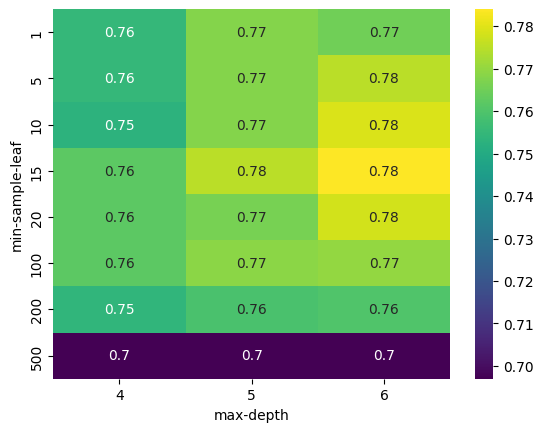

In [45]:
sns.heatmap(df_pivoted,annot=True,cmap='viridis');